In [1]:
import pandas as pd
import datetime as dt

# Define the start and end dates
start = dt.datetime(2021, 6, 1)
end = dt.datetime(2021, 12, 28)

# Load the CSV file and set 'Date' as the index
data = pd.read_csv('Tatacoffee13_21.csv', parse_dates=['Date'], index_col='Date')

# Filter the data based on the index
stk_data = data[(data.index >= start) & (data.index <= end)]

# Display the filtered data
print(stk_data)

              Open    High     Low   Close
Date                                      
2021-06-01  180.00  181.35  172.65  174.25
2021-06-02  173.55  175.65  172.05  174.00
2021-06-03  176.90  178.70  175.60  176.70
2021-06-04  177.90  177.90  173.75  174.35
2021-06-07  176.40  176.65  173.00  174.35
...            ...     ...     ...     ...
2021-12-22  202.90  207.80  201.35  205.00
2021-12-23  206.00  206.85  202.05  202.95
2021-12-24  203.90  203.90  199.35  201.00
2021-12-27  200.00  222.00  196.00  218.35
2021-12-28  219.65  220.45  211.55  212.35

[145 rows x 4 columns]


In [2]:
stk_data

,Open,High,Low,Close
Date,,,,
2021-06-01,180.00,181.35,172.65,174.25
2021-06-02,173.55,175.65,172.05,174.00
2021-06-03,176.90,178.70,175.60,176.70
2021-06-04,177.90,177.90,173.75,174.35
2021-06-07,176.40,176.65,173.00,174.35
...,...,...,...,...
2021-12-22,202.90,207.80,201.35,205.00
2021-12-23,206.00,206.85,202.05,202.95
2021-12-24,203.90,203.90,199.35,201.00


In [3]:
stk_data.index

DatetimeIndex(['2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04',
               '2021-06-07', '2021-06-08', '2021-06-09', '2021-06-10',
               '2021-06-11', '2021-06-14',
               ...
               '2021-12-15', '2021-12-16', '2021-12-17', '2021-12-20',
               '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24',
               '2021-12-27', '2021-12-28'],
              dtype='datetime64[ns]', name='Date', length=145, freq=None)

In [4]:
column="Close"

In [5]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (145, 1)


In [6]:
training_size = round(len(data1 ) * 0.95)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

138
X_train length: (138, 1)
X_test length: (7, 1)
y_train length: (138, 1)
y_test length: (7, 1)


In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:

from statsmodels.tsa.arima.model import ARIMA  # Correct module
from sklearn.metrics import mean_squared_error
from stockFunctions import rmsemape  # Ensure this is defined

# Example parameters (ensure X_train, y_test, and data1 are defined)
trends = ['n', 't', 'c', 'ct']
orders=[(0,0,1),(0,0,2)]

for td in trends:
        # Fit the MA model
        model = ARIMA(X_train, order=(0,0,10),trend=td,)
        model_fit = model.fit()
        
        # Make prediction
        y_pred = model_fit.predict(len(X_train), len(data1) - 1)
        
        # Evaluate using rmsemape
        mse=mean_squared_error(y_test,y_pred,squared=False)
        print("Trend={}".format(td))
        rmsemape(y_test,y_pred)
        print("************")

D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trend=n
RMSE-Testset: 0.3735683513443974
maPe-Testset: 0.5801773024664312
************
Trend=t
RMSE-Testset: 0.16311563956417838
maPe-Testset: 0.32687921955848614
************
Trend=c
RMSE-Testset: 0.1515921115246741
maPe-Testset: 0.21997529548891034
************
Trend=ct
RMSE-Testset: 0.13728319664914698
maPe-Testset: 0.28330180041628866
************


D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [9]:
len(y_pred)

7

In [10]:
#i=1
td="c"
model = ARIMA(X_train, order=(0,0,30),trend=td)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(X_train), len(data1)-1)
#print(y_pred)
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_pred,squared=False)
from stockFunctions import rmsemape
print("Trend={}".format(td))
rmsemape(y_test,y_pred)
print("************")

D:\APPS\Anaconda\envs\aiml\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trend=c
RMSE-Testset: 0.1560487149661693
maPe-Testset: 0.19091797843916453
************


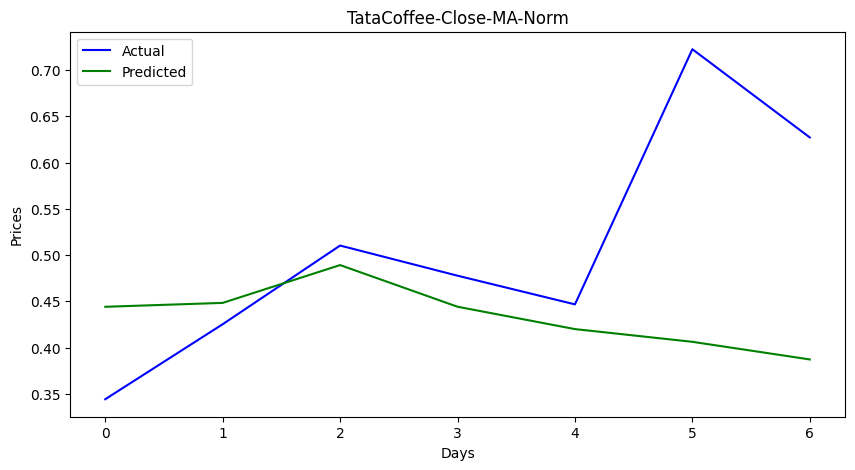

In [11]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","TataCoffee-Close-MA-Norm","Days","Prices")

In [12]:
len(data1)

145

In [13]:
y_test

array([[0.34419714],
       [0.42527822],
       [0.51033386],
       [0.47774245],
       [0.44674086],
       [0.72257552],
       [0.62718601]])

In [14]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [15]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

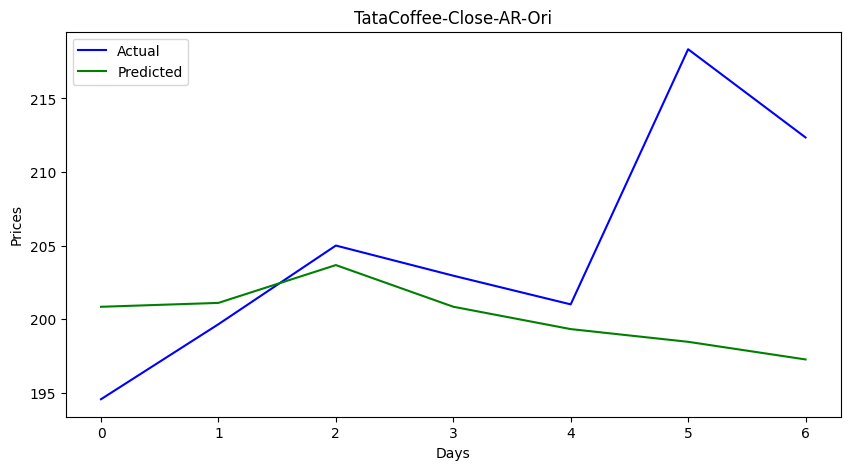

In [16]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-Close-AR-Ori","Days","Prices")

In [17]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 9.815464171372055
maPe-Testset: 0.032432582728602534


In [19]:
forecast=model_fit.predict(len(data1), len(data1))

In [20]:
forecast

array([0.42218824])

In [21]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [22]:
forecast_stock_price_test_oriF

,Closefore
0,199.45564


In [23]:
forecast_stock_price_test_oriF.to_csv("CloseMA.csv",index=False)